In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interactive
from mpl_toolkits.mplot3d import Axes3D

# Nonlinear Pendulum
## Lab 3

#### Instructions:
*Complete the notebook by reading all of the markdown cells and filling in the **blanks**. In the code cells, you will need to replace with the correct code everywhere you see a `___`. You may also need to add new code as appropriate. Please complete this lab during the lab slot and ask for help from the instructor or the TA as often as needed.*


## Introduction

We will study in this lab a strange property of the nonlinear pendulum.  

The equation of motion for a damped driven nonlinear pendulum is

\begin{align}
\frac{d^2 \theta}{dt^2} &= - \omega_0^2 \sin(\theta) -\gamma \frac{d \theta}{dt}  + A \sin(\omega t)\;.
\end{align}

In [2]:
# constant parameters

#pendulum length in metres
L = 9.8
#acceleration due to gravity
g = 9.8
# natural frequency
ω0 = np.sqrt(g/L)

Below is a program that solves either the linear driven, damped pendulum problem.

Linear means that we are using the small-angle approximation: $\sin(\theta) \approx \theta$.

In [3]:
def LinearPendulumStepper(x0=0.1, v0=0, 
                    γ=1, A=0, ω=0,
                    dt=0.01, tmax=10):
    """
    Solve for motion of a driven damped linear pendulum using Euler-Richardson
    
    x is the angular displacement (θ)
    v is the angular velocity (dθ/dt)
    """
    
    # initialize the model
    t = 0
    x = x0
    v = v0
    
    while True:
        model = {'t': t, 'x': x, 'v': v}
        yield model # return the model state back to the caller
    
        if t > tmax:
            break
            
        # calculate acceleration (force / mass)
        a = - ω0**2 * x - γ * v + A * np.sin(ω*t)
        
        # use the Euler-Richardson algorithm to update the state of the model
        vmid = v + 1/2 * a * dt
        xmid = x + 1/2 * v * dt
        tmid = t + 1/2 * dt
        amid = - ω0**2 * xmid - γ * vmid + A * np.sin(ω*tmid)
        
        v = v + amid * dt
        x = x + vmid * dt
        t = t + dt


In [4]:
def PendulumPlotter(data):
    fig, axs = plt.subplots(1, 1, figsize=(8,4))
    
    plt.plot(data.t, data.x)
    plt.ylabel("x")
    plt.xlabel("t")

In [5]:
def LinearPendulumApp(x0=1, v0=0, γ=0.5, ω=2, A=1, tmax=20):
    
    stepper = LinearPendulumStepper(x0=x0, v0=v0,
                              γ=γ, A=A, ω=ω,
                              tmax=tmax)
    data = pd.DataFrame(stepper)
    PendulumPlotter(data)
    
    return data

In [6]:
interactive(LinearPendulumApp, 
            x0=(0, 1, 0.1), v0=(0, 1, 0.1),
            γ=(0, 5, 0.2),
            A=(0.50, 2.0, 0.01),
            ω=(0.1, 4, 0.1),
            tmax=(10, 100, 10))

interactive(children=(FloatSlider(value=1.0, description='x0', max=1.0), FloatSlider(value=0.0, description='v…

## Linear behaviour

Start by carefully studying the above code.  By calling `PendulumApp()`, plot the solution of a *linear* pendulum with the parameters:

    A    = 1.44
    ω    = 2/3
    γ    = 0.5
    tmax = 100


Recall that for the linear pendulum, the period of the solution should be the same as period of the driving force, $2\pi/\omega$.

Confirm this by calculating the period from your simulation and comparing to the period of the driving force.

The code below (as introduced in lecture) could be useful. It find the local maximums in a time series.

In [7]:
def FindPeaks(data):
    """
    Find the last 10 maxima.
    """

    data['max'] = data.x[(data.x.shift(1) < data.x) & (data.x.shift(-1) < data.x)]
    return data.dropna().iloc[-10:]

*your answer here...*

## Non-linear behaviour

Modify the `NonlinearPendulumStepper` function below so that it solves for a *non-linear* pendulum (the restoring force depends on $\sin(\theta)$ and not just $\theta$).

Now plot the motion of a non-linear pendulum with the same parameters as given above. What is the period of the non-linear pendulum?

In [8]:
def NonlinearPendulumStepper(x0=0.1, v0=0, 
                    γ=1, A=0, ω=0,
                    dt=0.01, tmax=10):
    """
    Solve for motion of a driven damped nonlinear pendulum using Euler-Richardson
    
    x is the angular displacement (θ)
    v is the angular velocity (dθ/dt)
    """
    
    # initialize the model
    t = 0
    x = x0
    v = v0
    
    while True:
        model = {'t': t, 'x': x, 'v': v}
        yield model # return the model state back to the caller
    
        if t > tmax:
            break
            
        # >>>> Change the code below so that it solves for a nonlinear pendulum
        # calculate acceleration (force / mass)
        a = - ω0**2 * x - γ * v + A * np.sin(ω*t)
        
        # use the Euler-Richardson algorithm to update the state of the model
        vmid = v + 1/2 * a * dt
        xmid = x + 1/2 * v * dt
        tmid = t + 1/2 * dt
        amid = - ω0**2 * xmid - γ * vmid + A * np.sin(ω*tmid)
        
        v = v + amid * dt
        x = x + vmid * dt
        t = t + dt
        # <<<<< 
        
        # We need to adjust theta after each iteration so as to keep it between +/-π
        # The pendulum can now swing right around the pivot, corresponding to θ>2π.
        # Theta is an angular variable so values of theta that differ by 2π
        # correspond to the same position.
        # For plotting purposes it is nice to keep (-π < θ < π).
        # So, if theta is <-π, add 2π.If theta is > π, subtract 2π
        #********************************************************************************************
        if (x < -np.pi):
            x = x+2*np.pi 
        elif (x > np.pi):
            x = x-2*np.pi
        #********************************************************************************************
        # you may temporarily comment out the above if/elif block to see what happens
        
def NonlinearPendulumApp(x0=1, v0=0, γ=0.5, ω=2, A=1, tmax=20):
    
    stepper = NonlinearPendulumStepper(x0=x0, v0=v0,
                              γ=γ, A=A, ω=ω,
                              tmax=tmax)
    data = pd.DataFrame(stepper)
    PendulumPlotter(data)
    
    return data

Repeat the above analysis (run the simulation, make the plot, measure the period) with two additional simulations: `A = 1.35` and `A = 1.465`. 

When using the peaks to find the period, double check that you have the correct period: you need to find two crests with the *same* height.

Relative to the the frequency of the driving force, what have you discovered about a non-linear pendulum for $A = $ 1.35, 1.44, and 1.465.  

*your answer here...*

## Phase plots

Another way of visualization the periodic nature of the pendulum is make a *phase-plot* as we did in ecture. 

Make phase-plots (angular velocity vs angular displacement) for each of the four simulations you showed above.

*your answer here...*

### Bifurcation Diagram
A key observation in the this lab is that as we increase the driving force `A` the period increases.  Another way to understand this is to make a plot of all the values of $\theta$ which is *in-phase* with the driving force.  That is, consider only the value of $\theta$ that occurs when $\omega t = 2 n \pi$ where $n$ is an integer.  This is analogous to viewing a fast spinning object under a stroboscope.

*Just run the code below; no changes are needed. It is from a previous offering of the course where the codes were presented differently. Be patient, it takes a few moments to run.*

Text(0.5, 1.0, 'Bifurcation diagram for the pendulum')

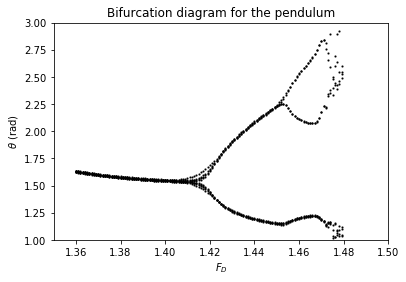

In [9]:
def Pendulum(N=1500, dt=0.04, F_D=0.0, Ω_D=0.0, q=0.5, θ_0=0.2, nonlinear=True):
    """
    Euler Cromer Solution for a damped, driven pendulum
    
    Keyword arguments: 
        N   number of timesteps
        dt  time step
        F_D driving force amplitude
        Ω_D driving force frequency
        q   damping strength
        θ_0 initial displacement
        
    Returns
        t time
        ω angular velocity
        θ angular displacement
    """
    
    #initializes omega, a vector of dimension N,to being all zeros
    ω = np.zeros(N)
    #initializes theta, a vector of dimensionN,to being all zeros
    θ = np.zeros(N)
    #this initializes the vector time to being all zeros
    t = np.zeros(N);
    
    #you need to have some initial displacement, otherwise the pendulum will not swing
    θ[0] = θ_0
    ω[0] = 0

    #loop over the timesteps.
    for i in range(N-1):
        
        if nonlinear:
            ω[i+1] = ω[i] + (-(g/L)*np.sin(θ[i]) - q*ω[i] + F_D*np.sin(Ω_D*t[i]))*dt
        else:
            ω[i+1] = ω[i] + (-(g/L)*θ[i]         - q*ω[i] + F_D*np.sin(Ω_D*t[i]))*dt
        
        temp_theta = θ[i]+ω[i+1]*dt
    
        # We need to adjust theta after each iteration so as to keep it between +/-π
        # The pendulum can now swing right around the pivot, corresponding to theta>2π.
        # Theta is an angular variable so values of theta that differ by 2π
        # correspond to the same position.
        # For plotting purposes it is nice to keep (-π < θ < π).
        # So, if theta is <-π, add 2π.If theta is > π, subtract 2π
        #********************************************************************************************
        if (temp_theta < -np.pi):
            temp_theta = temp_theta+2*np.pi 
        elif (temp_theta > np.pi):
            temp_theta = temp_theta-2*np.pi
        #********************************************************************************************
        
        # Update theta array
        θ[i+1]=temp_theta
        
        t[i+1] = t[i] + dt
        
    return t, ω, θ

fig, axes = plt.subplots()

Omega_D=2/3
for F_Drive_step in np.arange(1,13,0.1):
    F_Drive=1.35+F_Drive_step/100;
    # Calculate the plot of theta as a function of time for the current drive step
    # using the function :- pendulum_function
    t, omega, theta = Pendulum(F_D=F_Drive, Ω_D=Omega_D, N=10000);
    
    #Filter the results to exclude initial transient of 10 periods, note
    # that the period is 3*pi. 
    I = [i for i in range(len(t)) if t[i] < 3*np.pi*10]
    t[I] = float('nan')
    theta[I] = float('nan')
   
    # Further filter the results so that only results in phase with the driving force
    # F_Drive are displayed.
    # Replace all those values NOT in phase with NaN
    I = [i for i in range(len(t)) if abs(np.fmod(t[i],2*np.pi/Omega_D)) > 0.01]
    t[I] = float('nan')
    theta[I] = float('nan')
    
    # Remove all NaN values from the array to reduce dataset size 
    t = t[~np.isnan(t)]
    theta = theta[~np.isnan(theta)]
    
    F_Drive_Array = np.zeros(len(theta))
    F_Drive_Array[:] = F_Drive

    #Add a column to the plot of the results
    plt.plot(F_Drive_Array,theta,'ks', markersize=1)

# axes scales
plt.xlim(1.35, 1.5);
plt.ylim(1, 3);
plt.xlabel('$F_D$')
plt.ylabel('$\\theta$ (rad)')

plt.title('Bifurcation diagram for the pendulum')

The above diagram begins to show how the period changes as $F_D$ increases.  As $F_D$ continues to increase on the right of the graph, there is a transition to fully chaotic behaviour.  Here is much more detailed version of the bifurcation diagram (looking at $\omega$ instead of $\theta$) for the non-linear pendulum:

![](http://www.thphys.uni-heidelberg.de/~gasenzer/pendelplots/ppbif_q=2_g=0.99-1.51.jpeg)

See [this page](http://www.thphys.uni-heidelberg.de/~gasenzer/index.php?n1=teaching&n2=chaos) for the details.